In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dhruvmun","key":"72b25d9932fbbba90775b9567db0afb8"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [0]:
#!kaggle datasets list

In [5]:
!kaggle datasets download -d datamunge/sign-language-mnist

100% 30.8M/30.8M [00:00<00:00, 74.8MB/s]



In [6]:
!ls

kaggle.json  sample_data  sign-language-mnist.zip


In [7]:
!unzip sign-language-mnist.zip

!ls

Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_train.csv    
american_sign_language.PNG  kaggle.json		     sign_mnist_test.csv
amer_sign2.png		    sample_data		     sign_mnist_train.csv
amer_sign3.png		    sign-language-mnist.zip


## **Code Starts from here.. **

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('sign_mnist_train.csv')

In [3]:
dataset.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
X = dataset.iloc[:,1:].values.a4
y = dataset.iloc[:,0].values.astype('int32')

# Normalize
X /= 255

In [5]:
print(X.shape)
print(y.shape)

(27455, 784)
(27455,)


In [6]:
X = X.reshape(X.shape[0], 28, 28, 1)
print(X.shape)

(27455, 28, 28, 1)


In [7]:
idx2alph = {0:'a',1:'b',2:'c',3:'d',4:'e',5:'f',6:'g',7:'h',8:'i',9:'j',10:'k',11:'l',12:'m',13:'n',14:'o',
            15:'p',16:'q',17:'r',18:'s',19:'t',20:'u',21:'v',22:'w',23:'x',24:'y',25:'z'}

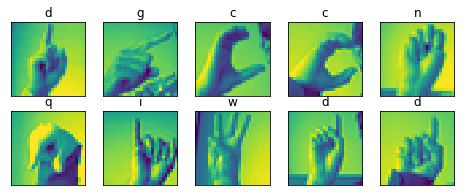

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,3))

for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    im = X[i]
    j = y[i].item()
    ax.set_title(idx2alph[j])
    plt.imshow(im)
plt.show()

In [19]:
from keras.utils.np_utils import to_categorical
y = to_categorical(y, 26)
print (y.shape)

Using TensorFlow backend.


(27455, 26)


In [8]:
print(X.shape)
print(y.shape)

(27455, 28, 28, 1)
(27455,)


In [9]:
import tensorflow as tf
from tensorflow import keras 

/usr/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(26, activation='softmax')
])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
__________

In [12]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
datagen.fit(X)

Using TensorFlow backend.


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
H = model.fit_generator(
    datagen.flow(X, y, batch_size=128),
    epochs = 50,
    verbose = 1,
    steps_per_epoch = 215
    )

Epoch 1/50
215/215 [==============================] - 40s 186ms/step - loss: 2.9028 - acc: 0.1305
Epoch 2/50
215/215 [==============================] - 39s 182ms/step - loss: 2.1454 - acc: 0.3118
Epoch 3/50
215/215 [==============================] - 39s 183ms/step - loss: 1.7551 - acc: 0.4185
Epoch 4/50
215/215 [==============================] - 39s 184ms/step - loss: 1.5338 - acc: 0.4818
Epoch 5/50
215/215 [==============================] - 40s 186ms/step - loss: 1.3880 - acc: 0.5283
Epoch 6/50
215/215 [==============================] - 40s 184ms/step - loss: 1.2750 - acc: 0.5595
Epoch 7/50
215/215 [==============================] - 40s 188ms/step - loss: 1.2155 - acc: 0.5769
Epoch 8/50
215/215 [==============================] - 41s 189ms/step - loss: 1.1587 - acc: 0.5980
Epoch 9/50
215/215 [==============================] - 40s 187ms/step - loss: 1.1052 - acc: 0.6197
Epoch 10/50
215/215 [==============================] - 41s 191ms/step - loss: 1.0639 - acc: 0.6306
Epoch 11/50
215/215

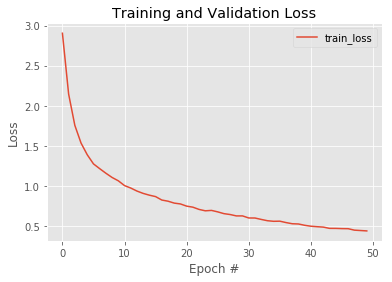

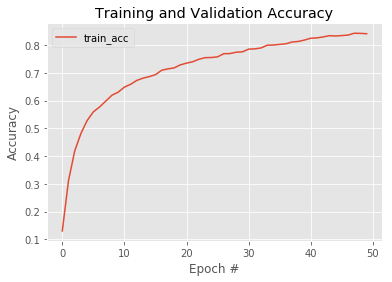

In [19]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
N = 50

plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

plt.figure()
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
#plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")

In [20]:
model.save('sign_language_model2.h5')
del model

In [22]:
my_model = tf.keras.models.load_model('sign_language_model2.h5')

In [24]:
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
__________

In [25]:
dataset = pd.read_csv('sign_mnist_test.csv')

In [26]:
dataset[:5]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [27]:
X_test = dataset.iloc[:,1:].values.astype('float32')
y_test = dataset.iloc[:,0].values.astype('int32')

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [28]:
print(X_test.shape)
print(y_test.shape)

(7172, 28, 28, 1)
(7172,)


In [29]:
Y_pred = model.predict(X_test, batch_size=128, verbose=0)

In [30]:
Y_pred = np.argmax(Y_pred, axis=1)
Y_pred

array([ 6,  5, 10, ...,  2,  4,  2])

In [31]:
print(Y_pred[:10])
print(y_test[:10])

[ 6  5 10  0  3 21 17 14  3  7]
[ 6  5 10  0  3 21 10 14  3  7]
